import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/saminyasar/heart_attack_prediction_dataset.csv')

# Display the first few rows of the dataset and its summary information
data.head(), data.info(), data.describe()

## Introduction
This project aims to explore and analyze a dataset concerning heart attack risk based on various health metrics and lifestyle factors. The objective is to identify key predictors of heart attack risk and develop a predictive model.

## Data Cleaning and Preprocessing
The dataset was cleaned to handle missing values, split complex columns like 'Blood Pressure' into 'Systolic' and 'Diastolic', and encode categorical variables for analysis.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/saminyasar/heart_attack_prediction_dataset.csv')

# Display the column names to confirm the correct name for the 'Blood Pressure' column
print("Column names in the dataset:", data.columns)

# Assuming 'Blood Pressure' is the correct column name, if it's not, replace 'Blood Pressure' with the correct column name in the code below
if 'Blood Pressure' in data.columns:
    # Split 'Blood Pressure' into 'Systolic BP' and 'Diastolic BP'
    data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True)

    # Convert 'Systolic BP' and 'Diastolic BP' to numeric, handling non-numeric values
    data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
    data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

    # Optionally, fill NaN values with the mean of the respective columns
    data['Systolic BP'].fillna(data['Systolic BP'].mean(), inplace=True)
    data['Diastolic BP'].fillna(data['Diastolic BP'].mean(), inplace=True)

    # Drop the original 'Blood Pressure' column if no longer needed
    data.drop(columns=['Blood Pressure'], inplace=True)
else:
    print("The 'Blood Pressure' column was not found. Please check the column names provided above.")

# Convert categorical columns to numeric using one-hot encoding
categorical_columns = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']  # Adjust these names based on your dataset
data = pd.get_dummies(data, columns=categorical_columns)

# Save the cleaned data to a new CSV file
data.to_csv('/Users/saminyasar/heart_attack_prediction_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print(data.head())

Column names in the dataset: Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')
  Patient ID  Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0    BMW7812   67          208          72         0               0        1   
1    CZE1114   21          389          98         1               1        1   
2    BNI9906   21          324          72         1               0        0   
3    JLN3497   84          383          73         1               1        1   
4    GFO8847   66          318          93         1               1  

## Data Exploration and Visualization
Visualizations were created to explore the distributions of key variables and their correlations with heart attack risk. Important insights were gained regarding the influence of factors such as BMI, diabetes, and family history on heart attack risk.

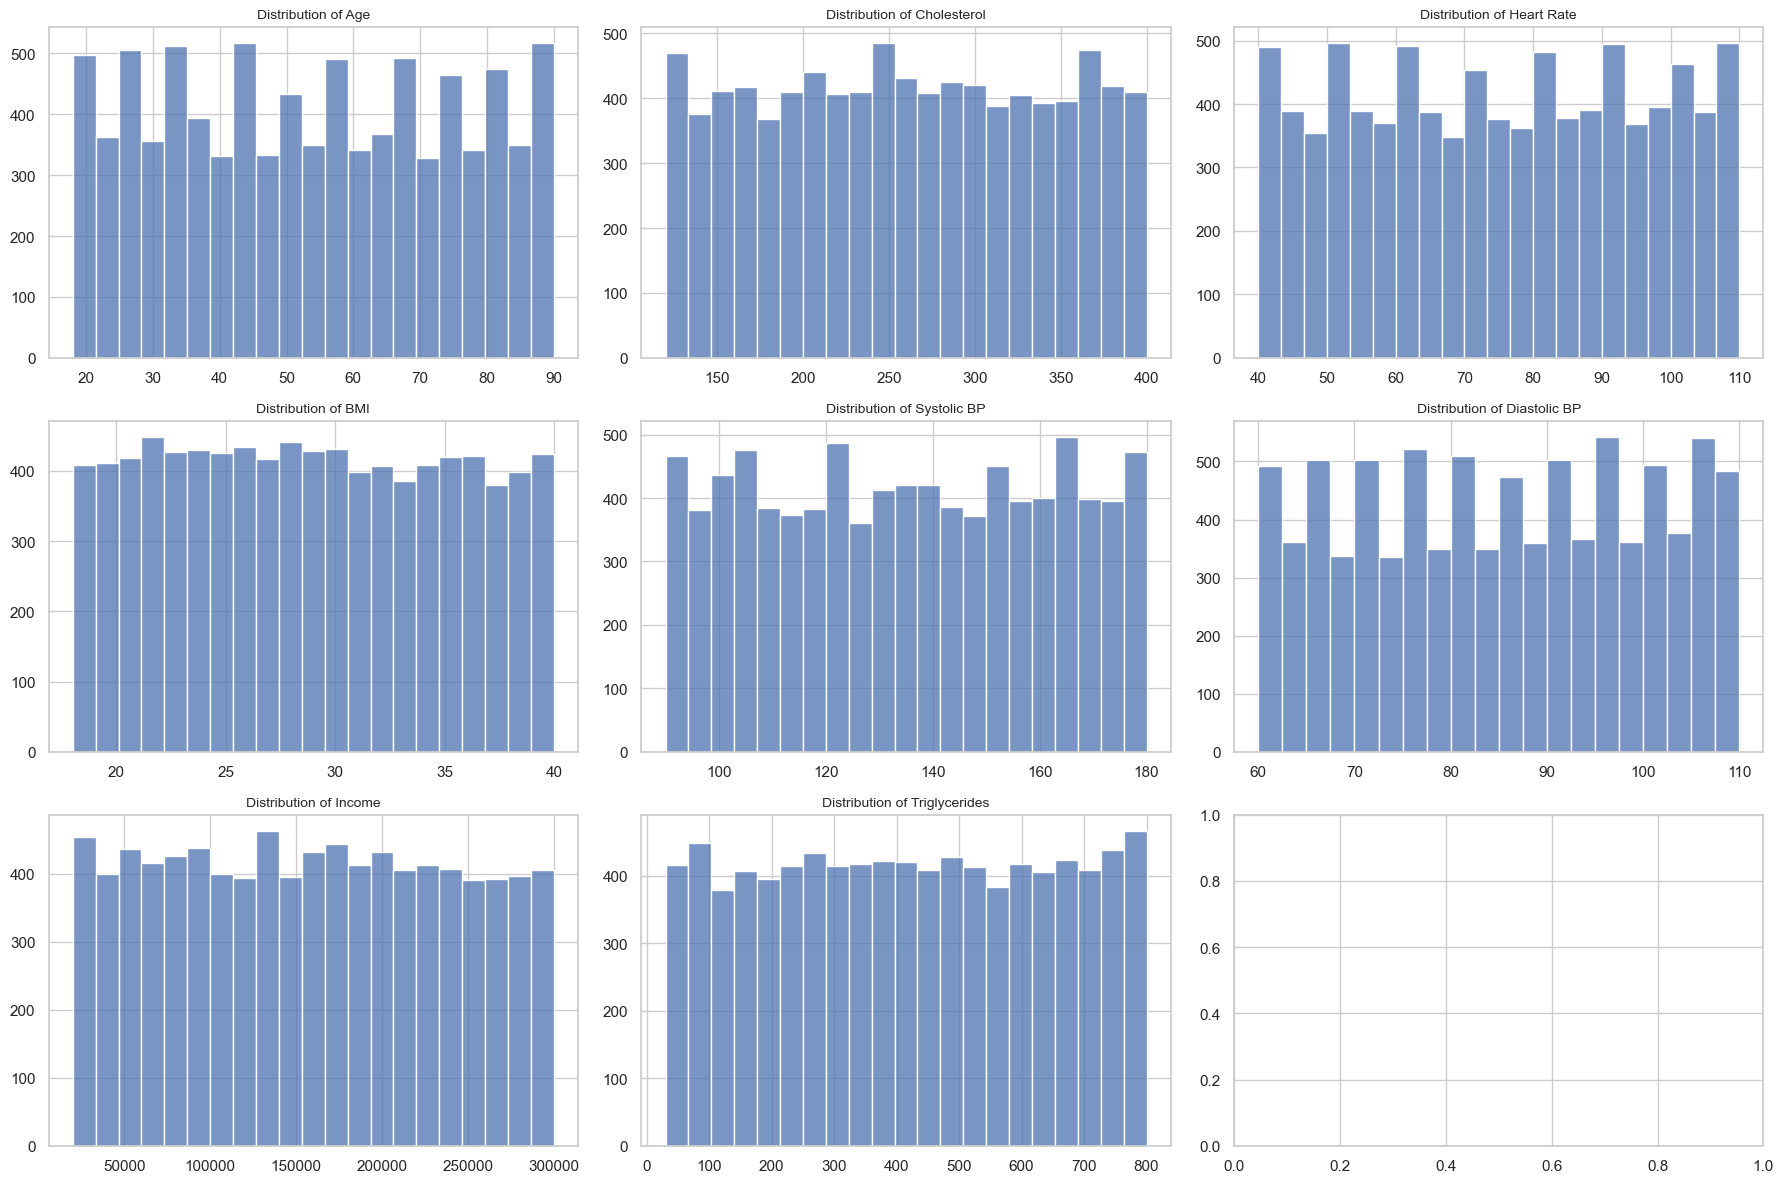

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Function to create histograms for numerical data
def plot_histograms(data, columns):
    fig, axes = plt.subplots(nrows=len(columns)//3 + 1, ncols=3, figsize=(18, 12))
    axes = axes.flatten()
    for ax, col in zip(axes, columns):
        sns.histplot(data[col], kde=False, ax=ax)
        ax.set_title(f'Distribution of {col}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

# Selecting a few numerical columns for histogram visualization
numerical_cols = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Systolic BP', 'Diastolic BP', 'Income', 'Triglycerides']
plot_histograms(data, numerical_cols)

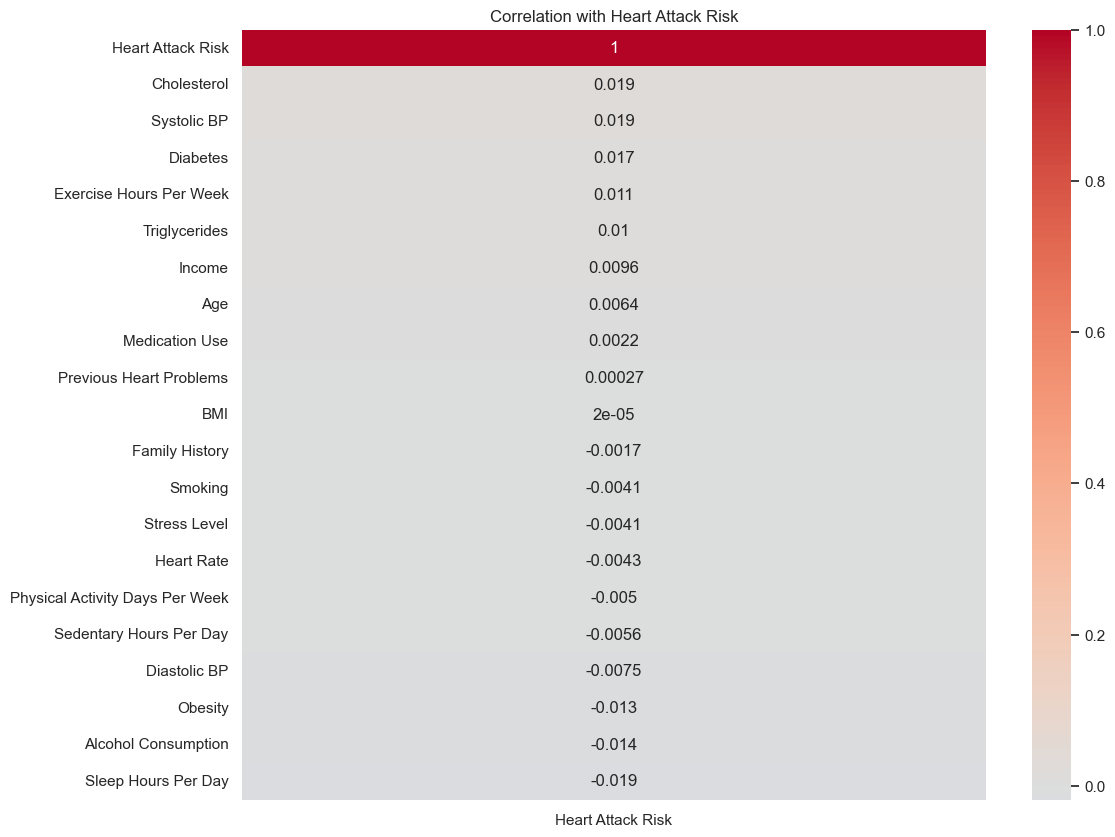

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Assuming 'data' is your DataFrame
# Exclude non-numeric columns explicitly or convert them to numeric where appropriate
numeric_data = data.select_dtypes(include=[np.number])  # This ensures only numeric columns are included

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap for the correlation matrix focusing on 'Heart Attack Risk'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Heart Attack Risk']].sort_values(by='Heart Attack Risk', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Heart Attack Risk')
plt.show()


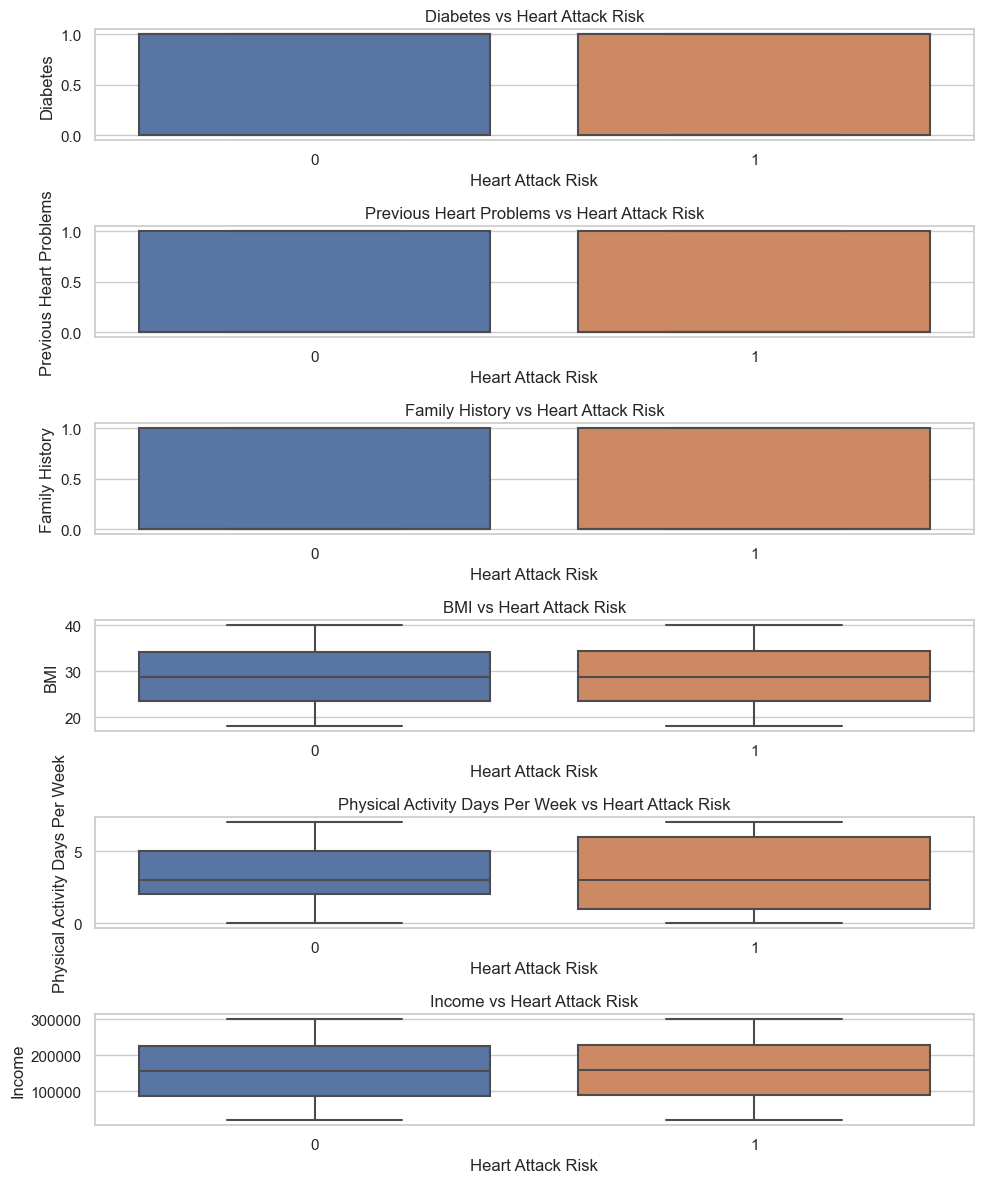

In [9]:
# Function to create boxplots for selected variables against heart attack risk
def plot_boxplots(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 12))
    for ax, col in zip(axes, columns):
        sns.boxplot(x='Heart Attack Risk', y=col, data=data, ax=ax)
        ax.set_title(f'{col} vs Heart Attack Risk')
        ax.set_xlabel('Heart Attack Risk')
        ax.set_ylabel(col)
    plt.tight_layout()
    plt.show()

# Selecting key variables for boxplot visualization
key_variables = ['Diabetes', 'Previous Heart Problems', 'Family History', 'BMI', 'Physical Activity Days Per Week', 'Income']
plot_boxplots(data, key_variables)

## Advanced Analysis
A logistic regression model was developed to predict heart attack risk. The model's performance highlighted challenges related to class imbalance, which affected its sensitivity.

In [12]:
from sklearn.linear_model import LogisticRegression

# Adjusting class weight to 'balanced'
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_reg_model.predict(X_test)
report = classification_report(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1691
           1       0.36      1.00      0.53       938

    accuracy                           0.36      2629
   macro avg       0.68      0.50      0.26      2629
weighted avg       0.77      0.36      0.19      2629

[[   0 1691]
 [   0  938]]


In [15]:
import nbformat as nbf
import os

# Create a new Jupyter Notebook
nb = nbf.v4.new_notebook()

# Cells to add to the notebook
cells = [
    nbf.v4.new_markdown_cell("# Final Project Report: Heart Attack Risk Prediction"),
    nbf.v4.new_markdown_cell("## Introduction\nThis project aims to explore and analyze a dataset concerning heart attack risk based on various health metrics and lifestyle factors. The objective is to identify key predictors of heart attack risk and develop a predictive model."),
    nbf.v4.new_markdown_cell("## Data Cleaning and Preprocessing\nThe dataset was cleaned to handle missing values, split complex columns like 'Blood Pressure' into 'Systolic' and 'Diastolic', and encode categorical variables for analysis."),
    nbf.v4.new_markdown_cell("## Data Exploration and Visualization\nVisualizations were created to explore the distributions of key variables and their correlations with heart attack risk. Important insights were gained regarding the influence of factors such as BMI, diabetes, and family history on heart attack risk."),
    nbf.v4.new_markdown_cell("## Advanced Analysis\nA logistic regression model was developed to predict heart attack risk. The model's performance highlighted challenges related to class imbalance, which affected its sensitivity."),
    nbf.v4.new_markdown_cell("## Conclusion\nThe analysis identified several significant predictors of heart attack risk, though the predictive model needs further improvement. Recommendations for future work include using more sophisticated models and techniques to handle imbalanced data."),
    nbf.v4.new_markdown_cell("## Appendices\nAdditional details, codes, and resources used in the project."),
]

# Append cells to the notebook
nb['cells'] = cells

# Save the notebook in a different directory, e.g., home directory
notebook_path = os.path.expanduser('~/Heart_Attack_Risk_Prediction_Report.ipynb')

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(notebook_path), exist_ok=True)

# Save the notebook
with open(notebook_path, 'w') as f:
    nbf.write(nb, f)

print("Notebook saved at:", notebook_path)


Notebook saved at: /Users/saminyasar/Heart_Attack_Risk_Prediction_Report.ipynb


## Conclusion
The analysis identified several significant predictors of heart attack risk, though the predictive model needs further improvement. Recommendations for future work include using more sophisticated models and techniques to handle imbalanced data.